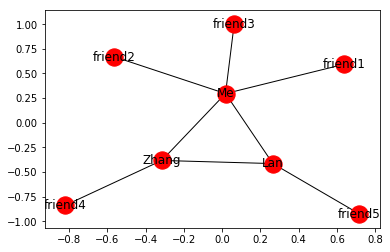

In [3]:
import networkx as nx
import gensim 
import numpy as np
import matplotlib.pyplot as plt
node_list=['friend1','friend2','friend3','Me','Zhang','Lan','friend4','friend5']
edge_list=[('friend1','Me',1),('friend2','Me',1),('friend3','Me',1),('Zhang','Me',1)
,('Lan','Me',1),('friend4','Zhang',1),('friend5','Lan',1),('Zhang','Lan',1)]
#创建空图
G=nx.Graph()
#从一个列表中添加节点
G.add_nodes_from(node_list)
#根据（边，边，权重）加载
G.add_weighted_edges_from(edge_list)
#plot
nx.draw_networkx(G,node_list=G.nodes(),edges=edge_list)

In [58]:
import random
random.seed(666)
def random_walk(G,start=None,path_length=20,alpha=0,rand=random.Random()):
    '''return a random walk path'''
    if start:
        path=[start]
    else:
        path=[rand.choice(list(G.nodes()))]
    while len(path)<path_length:
        cur=path[-1]
        #find it's neighbors
        if len(G[cur])>0:
            if rand.random()>=alpha:
                path.append(rand.choice(list(nx.all_neighbors(G,cur))))
            else:
                path.append(path[0])
        else:
            break
    return path
print(random_walk(G,start='Me'))
            

['Me', 'friend1', 'Me', 'friend1', 'Me', 'friend1', 'Me', 'friend2', 'Me', 'friend1', 'Me', 'friend3', 'Me', 'friend3', 'Me', 'Lan', 'friend5', 'Lan', 'Me', 'friend2']


In [59]:
def build_deepwalk_corpus(G,num_paths,rand=random.Random()):
    walks=[]
    nodes=list(G.nodes())
    for i in range(num_paths):
        rand.shuffle(nodes)
        for node in nodes:
            walks.append(random_walk(G,start=node))
    return walks
print(build_deepwalk_corpus(G,num_paths=2))

[['Me', 'friend2', 'Me', 'Zhang', 'Me', 'Lan', 'Me', 'friend3', 'Me', 'friend3', 'Me', 'friend3', 'Me', 'friend3', 'Me', 'friend2', 'Me', 'friend2', 'Me', 'friend1'], ['friend1', 'Me', 'friend2', 'Me', 'Zhang', 'Lan', 'Me', 'friend1', 'Me', 'Zhang', 'Lan', 'Me', 'Zhang', 'Me', 'Zhang', 'friend4', 'Zhang', 'friend4', 'Zhang', 'friend4'], ['Lan', 'Me', 'friend1', 'Me', 'friend2', 'Me', 'Zhang', 'Lan', 'friend5', 'Lan', 'Me', 'friend3', 'Me', 'friend1', 'Me', 'friend1', 'Me', 'friend1', 'Me', 'friend3'], ['friend5', 'Lan', 'Me', 'Lan', 'Zhang', 'friend4', 'Zhang', 'friend4', 'Zhang', 'friend4', 'Zhang', 'friend4', 'Zhang', 'Me', 'friend1', 'Me', 'friend1', 'Me', 'friend3', 'Me'], ['friend2', 'Me', 'friend1', 'Me', 'friend1', 'Me', 'Lan', 'Me', 'Lan', 'friend5', 'Lan', 'Me', 'friend2', 'Me', 'friend3', 'Me', 'Zhang', 'Lan', 'Me', 'friend3'], ['Zhang', 'friend4', 'Zhang', 'Me', 'friend1', 'Me', 'friend3', 'Me', 'friend1', 'Me', 'Lan', 'Zhang', 'Lan', 'Me', 'friend2', 'Me', 'Zhang', 'Lan', '

In [81]:
from gensim.models import Word2Vec
corpus=build_deepwalk_corpus(G,num_paths=20)
model=Word2Vec(corpus,size=20,window=2,min_count=1,sg=1,iter=30)
model.wv['Me']
model.wv.most_similar('friend4')

[('Zhang', 0.9844411611557007),
 ('Lan', 0.9722907543182373),
 ('friend5', 0.9581975340843201),
 ('friend1', 0.865242063999176),
 ('Me', 0.8347228765487671),
 ('friend2', 0.8336395621299744),
 ('friend3', 0.8204163312911987)]

In [82]:
model.wv.most_similar('Zhang',topn=1)

[('Lan', 0.991287350654602)]